In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

In [2]:
## Reading in CSV file, all code written on Jupyter Notebook
player_data = pd.read_csv(r"C:\Users\rorym\fpl\Fantasy-Premier-League-master\data\2021-22\cleaned_players.csv")
player_data

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Bernd,Leno,0,0,4,270,9,0.0,79.0,0.0,0,48,7.9,0,0,0,1.8,49,GK
1,Rúnar Alex,Rúnarsson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,1.1,40,GK
2,Willian,Borges Da Silva,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,63,MID
3,Pierre-Emerick,Aubameyang,1,0,11,177,4,25.2,40.8,122.0,3,35,18.7,1,0,0,2.2,99,FWD
4,Cédric,Soares,0,0,1,188,7,36.1,30.8,1.0,0,21,6.8,0,0,1,0.2,44,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Patrick,Cutrone,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,50,FWD
595,Luke,Cundle,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,45,MID
596,Chem,Campbell,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.3,45,MID
597,Christian,Marques,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.3,40,DEF


In [3]:
### DF info

player_data.shape
player_data.columns

Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type'],
      dtype='object')

In [4]:
## DF Datatypes

player_data.dtypes

first_name              object
second_name             object
goals_scored             int64
assists                  int64
total_points             int64
minutes                  int64
goals_conceded           int64
creativity             float64
influence              float64
threat                 float64
bonus                    int64
bps                      int64
ict_index              float64
clean_sheets             int64
red_cards                int64
yellow_cards             int64
selected_by_percent    float64
now_cost                 int64
element_type            object
dtype: object

In [5]:
### Aim is to find players with the most ict threat without the points to correspond with their allocated threat.
### I.E underperforming their threat expectation

## Making new column based on dividing a players total points versus their ICT rating. Looking for players with low points relative to their ICT so low figures are desirable in this colum
player_data['Total Points/ICT']= player_data['total_points']/player_data['ict_index']

## Removing negative/null figures
player_data_potential=player_data.loc[player_data['Total Points/ICT']>0]

## Replacing infinite figures with NaN caused by null on ICT index
player_data_potential.replace([np.inf, -np.inf], np.nan)

## Removing NA's
player_data_potential.dropna(subset = ['Total Points/ICT'])

## Sorting by lowest at top
player_data_potential=player_data_potential.sort_values('Total Points/ICT')

## Filtering for more than 10 points as subset shown limited to players who have 1 or 2 points
player_data_potential=player_data_potential.loc[player_data_potential['total_points'] > 10]

## Top 15 players with point potential for review
player_data_potential.head(15)

## As of week 5: Notable inclusions are Grealish,Mane,Sarr,Elyounoussi and GroB

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,Total Points/ICT
337,Jack,Grealish,1,1,18,344,1,175.6,103.2,178.0,0,88,45.7,3,0,1,20.5,80,MID,0.393873
339,Ilkay,Gündogan,1,0,16,338,1,149.2,77.8,178.0,1,80,40.4,3,0,1,5.3,73,MID,0.396040
316,Sadio,Mané,2,1,24,360,1,111.2,107.2,361.0,0,55,57.9,3,0,0,2.7,119,MID,0.414508
292,Raphael,Dias Belloli,1,0,12,360,11,109.2,80.4,92.0,0,40,28.2,0,0,1,15.2,65,MID,0.425532
526,Ismaila,Sarr,1,0,15,360,7,114.3,74.6,135.0,2,48,32.5,0,0,0,5.2,60,MID,0.461538
467,Mohamed,Elyounoussi,1,0,11,180,2,35.7,57.2,145.0,1,28,23.8,1,0,0,0.1,55,MID,0.462185
558,Declan,Rice,0,1,11,360,5,98.3,110.8,27.0,1,80,23.6,1,0,2,4.6,50,MID,0.466102
285,Patrick,Bamford,1,1,16,346,11,31.5,73.4,209.0,2,48,31.3,0,0,1,12.9,79,FWD,0.511182
100,Pascal,Groß,0,2,14,270,3,143.6,85.4,44.0,1,70,27.3,1,0,0,0.7,60,MID,0.512821
70,Ivan,Toney,1,0,12,360,2,69.1,49.8,113.0,1,46,23.2,2,0,1,15.5,64,FWD,0.517241


In [6]:
### Focusing on specific positions (GK/DEF/MID/FWD) to find an affordable transfer option

## Changing element_type to a string
player_data['element_type']=player_data['element_type'].astype('string')

## Transfer funds available = 4.9M and Position = DEF and less than 10% ownership (differential)
player_data_transfer=player_data.loc[(player_data['now_cost']<=49) & (player_data['element_type']=='DEF') & (player_data['selected_by_percent']<10)]

## Sorting by influence
player_data_transfer=player_data_transfer.sort_values('influence',ascending=False)

player_data_transfer.head(15)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,Total Points/ICT
464,Mohammed,Salisu,0,0,12,360,6,24.9,112.2,41.0,3,71,17.8,1,0,1,0.2,45,DEF,0.674157
280,Liam,Cooper,0,1,4,360,11,25.8,104.2,14.0,0,59,14.5,0,0,3,0.3,45,DEF,0.275862
431,Max,Aarons,0,0,5,360,11,78.8,93.6,36.0,2,59,20.8,0,0,1,1.7,45,DEF,0.240385
139,Ben,Mee,1,0,10,360,8,11.4,93.4,53.0,0,43,15.8,0,0,1,0.6,49,DEF,0.632911
106,Adam,Webster,0,0,9,306,3,17.8,87.2,0.0,0,51,10.5,1,0,1,0.5,45,DEF,0.857143
452,Jack,Stephens,0,0,8,360,6,25.6,86.0,4.0,0,60,11.7,1,0,2,0.1,45,DEF,0.683761
412,Federico,Fernández,0,0,2,257,8,13.4,85.6,10.0,0,47,10.9,0,0,0,0.2,45,DEF,0.183486
146,Charlie,Taylor,0,0,5,360,8,54.5,83.4,4.0,0,49,14.2,0,0,0,0.4,45,DEF,0.352113
439,Ben,Gibson,0,0,2,270,10,1.6,81.6,55.0,0,46,13.9,0,0,0,0.1,45,DEF,0.143885
424,Grant,Hanley,0,0,3,360,11,21.6,81.0,38.0,0,57,14.1,0,0,1,0.1,44,DEF,0.212766


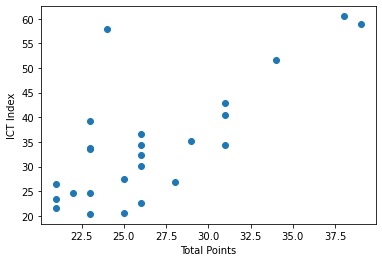

In [9]:
### Plotting Total points vs ICT Index
points_vs_ict = player_data.loc[(player_data['total_points'] > 20) & (player_data['ict_index']>= 20)]
x=points_vs_ict['total_points']
y=points_vs_ict['ict_index']
plt.scatter(x,y)
plt.xlabel('Total Points')
plt.ylabel('ICT Index')
#plt.annotate(points_vs_ict['second_name'])
names=points_vs_ict['second_name']